# To solve this lab, I start from the work done in the previous labs (lab-cleaning-numerical-data, lab-cleaning-categorical-data, and lab-feature-extraction). At the end of the lab-feature-extraction, in the cell #39, I start this lab-data-cleaning-and-wrangling.

 · lab-cleaning-numerical-data ends in cell #15
 
 · lab-cleaning-categorical-data ends in cell #30
 
 · lab-feature-extraction ends in cell #39

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import imblearn
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.columns = [columns_name.lower() for columns_name in customer_df.columns]
customer_df.columns = [columns_name.replace(' ', '_') for columns_name in customer_df.columns]
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

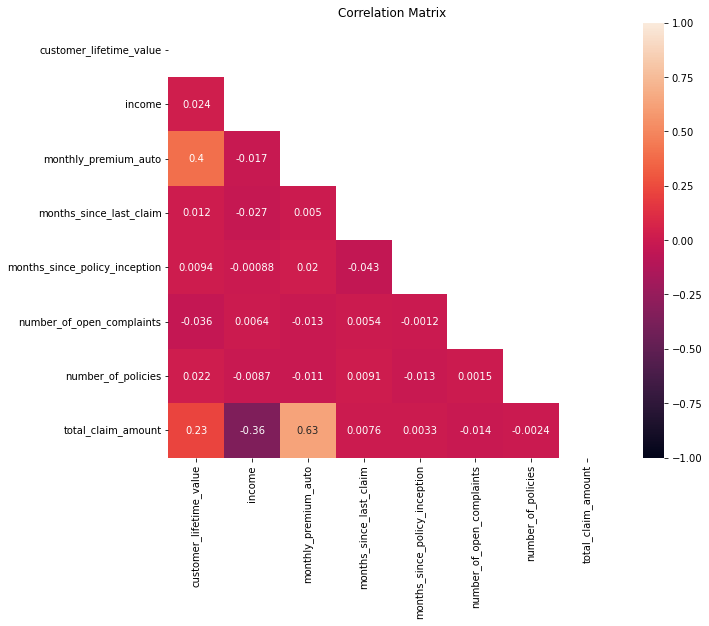

In [8]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(customer_df.corr(), dtype=bool))
sns.heatmap(customer_df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix does not show a high correlation (greather than 0.9) between any of the features and the target variable ('total_claim_amount'). The highest correlation is in between 'monthly_premium_auto' and the target, and it is uderstandable/expected to have some kind of dependecy or correlation in between these two, because the premium someone pays for their auto does indeed influence the amount they will eventually claim if they have to.

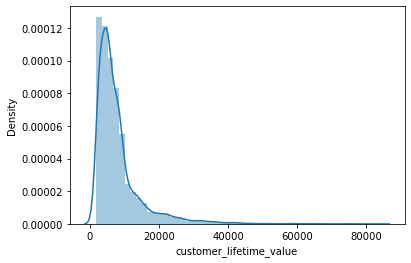

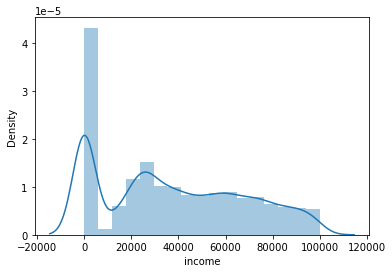

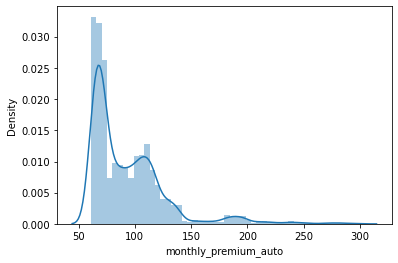

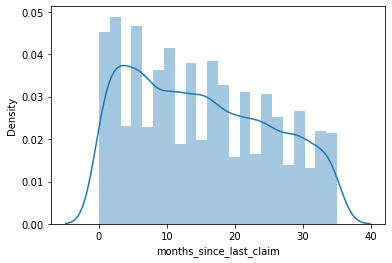

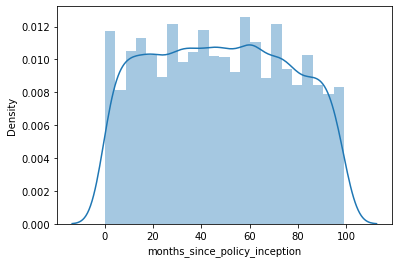

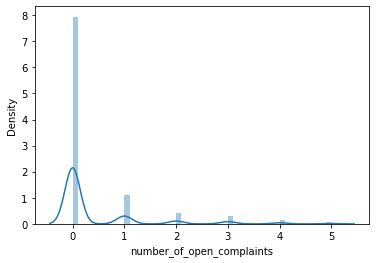

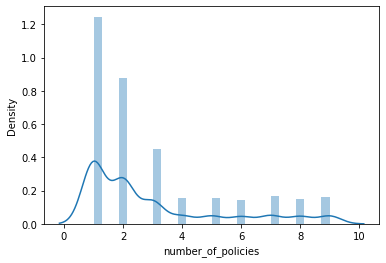

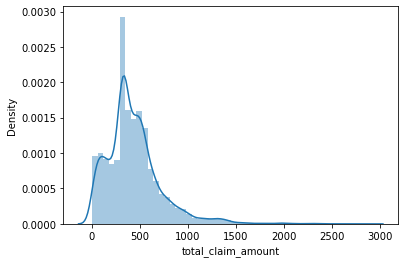

In [9]:
numerical_df = customer_df.select_dtypes(np.number)
for col in numerical_df:
    sns.distplot(customer_df[col])
    plt.show()

I do not see anything to remark. The only plot that could look more or less similar to a normal distribution is the one of 'months_since_policy_inception', but it is still far from being a normal distribution. The other seven I believe they reflect the reality and there is nothing suprising in them.


In [10]:
categorical_df_ = customer_df.drop('customer', axis=1)

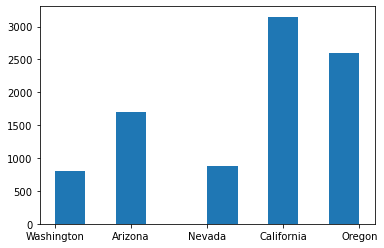

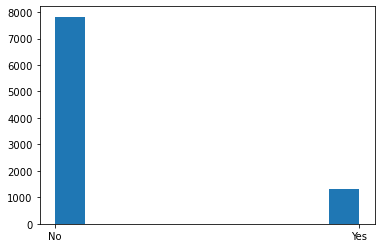

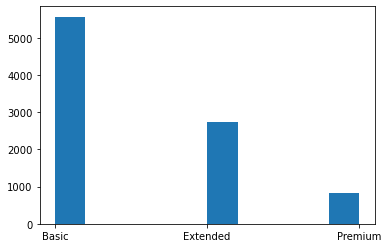

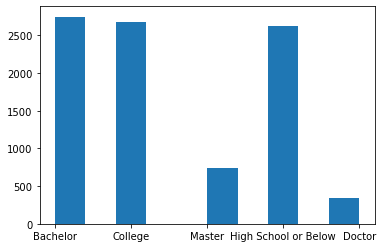

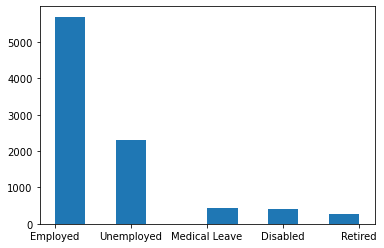

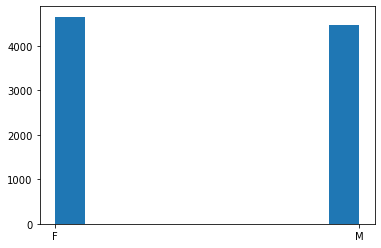

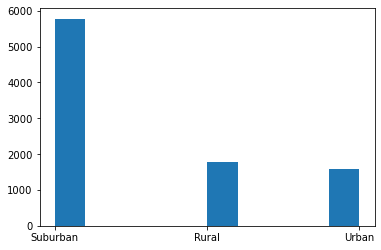

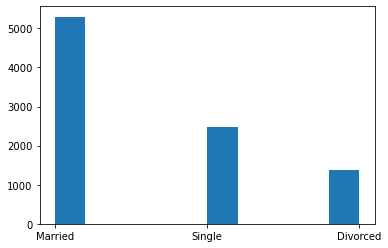

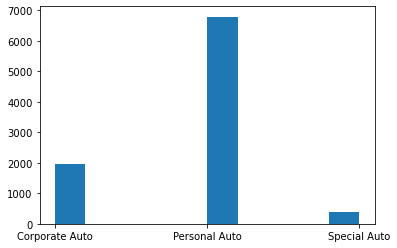

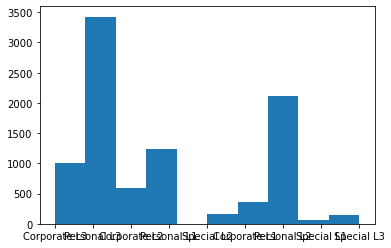

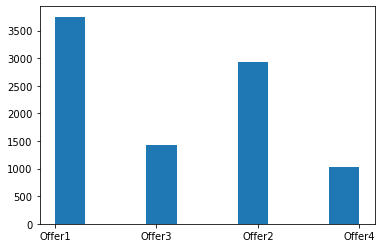

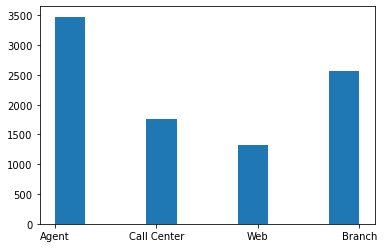

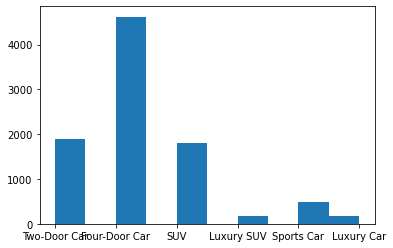

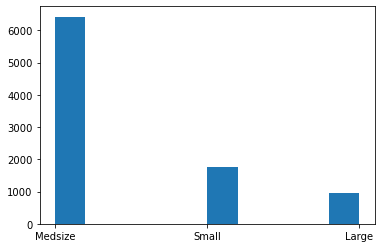

In [11]:
categorical_df = categorical_df_.select_dtypes(object)
for col in categorical_df:
    plt.hist(customer_df[col])
    plt.show()

I do not plot 'customer' column as it is the Customer ID, a unique identifier of the customers by which the company recognizes each customer, and we could use it as index column. 

What I can see is that most of the customers are from "California" 'state'; the majority of the customers has "NO" as 'response'; there is preponderance toward "Basic" 'coverage'; slightly more than half of the customers have "College" or "Bachelor" 'education'; more than half of the customers are "Employed" and active; there is an equitable 'gender' balance of customers; more than half of the customers live in "Suburban" areas; more than half of the customers are "Married"; more than two-thirds of customers have coverage for a "Personal Auto"; the majority of customers have a "Personal" 'policy'; more than one-third of customers have the "Offer1" as 'renew_offer_type'; the majority of customers come from "Agent" or "Branch" 'sales_channel'; half of customers have a "Four-Door Car"; and most of the customers have a "Medsize" auto.

In [12]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


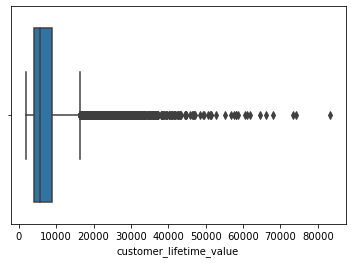

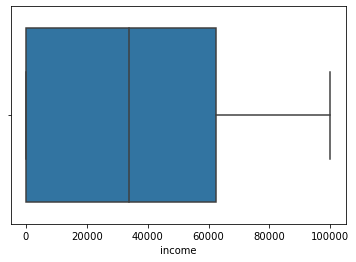

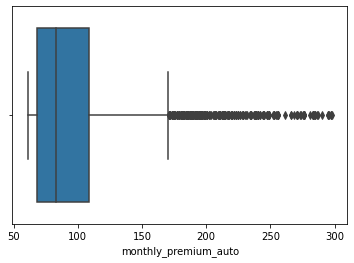

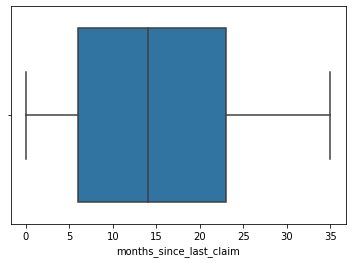

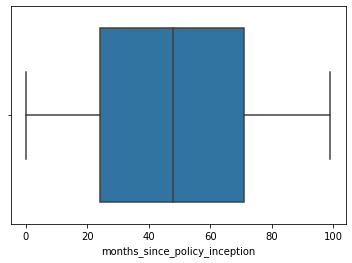

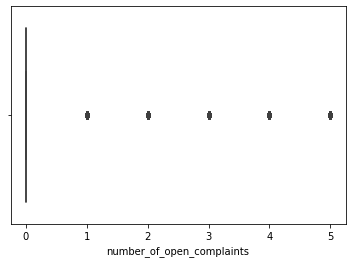

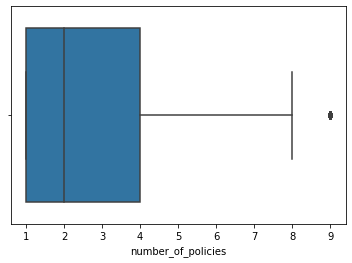

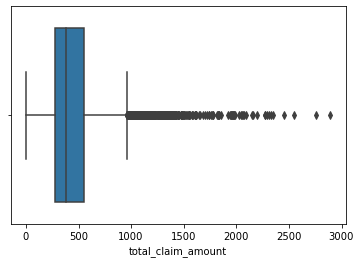

In [13]:
for col in numerical_df:
    sns.boxplot(customer_df[col])
    plt.show()

There are some outliers in features such as 'customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies', but I believe it is natural and reflects the reality and circusmtances of the dataset. It is necesary to rememeber that not all people has the same standard of living, and as the categories within the categorical data reflect, some customers have Luxury SUV´s, Sport Cars, and Luxury Cars. Additionally, some customers have Corporate cars and Corporate policy types, so they are insured by their companies. All of the previously mentioned, Luxury and Corporate, usually have higher standards of living and higher policy premiums, so the outliers are natural and reflect the reality. I would proceed analyzing the data or building a model without removing them, at least initially, but taking into account that we have them in the dataset to better understand the results of the analysis or the metrics of the model. 

In [14]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [15]:
nulls = pd.DataFrame(customer_df.isna().sum()*100/len(customer_df), columns=['Percentage'])
nulls.sort_values('Percentage', ascending = False)

,Percentage
customer,0.0
state,0.0
vehicle_class,0.0
total_claim_amount,0.0
sales_channel,0.0
renew_offer_type,0.0
policy,0.0
policy_type,0.0
number_of_policies,0.0
number_of_open_complaints,0.0


We do not have nulls so we do not have to deal with that. 

# I have already: 

1. Imported the necessary libraries 
2. Loaded the CSV file
3. Solved what to do with the 'customer' column, that is setting it as the index column. However, to solve this lab-data-cleaning-and-wrangling I am initially not going to use it as index to avoid trouble when encoding categorical features and then joining those encoded categorical dataframes to the main dataframe. After encoding with OneHotEncoder, I will set 'customer' as the index column.
4. Divided the columns to numerical (numerical_df) and categorical (categorical_df) variables

So below I will continue with steps 5 and 6 of the lab-cleaning-categorical-data

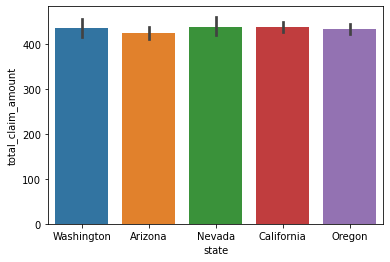

In [16]:
sns.barplot(x="state", y="total_claim_amount", data=customer_df)
plt.show()

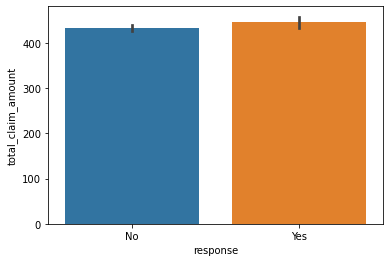

In [17]:
sns.barplot(x="response", y="total_claim_amount", data=customer_df)
plt.show()

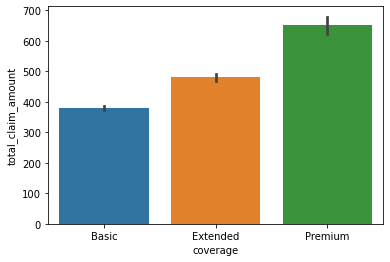

In [18]:
sns.barplot(x="coverage", y="total_claim_amount", data=customer_df)
plt.show()

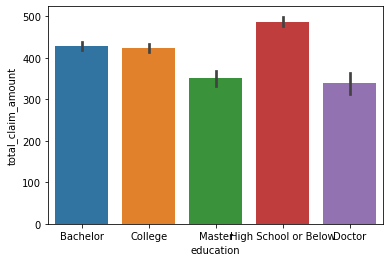

In [19]:
sns.barplot(x="education", y="total_claim_amount", data=customer_df)
plt.show()

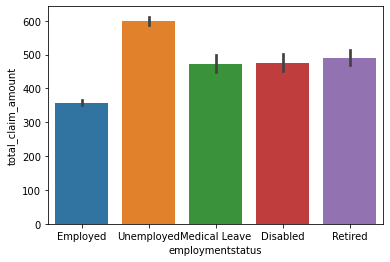

In [20]:
sns.barplot(x="employmentstatus", y="total_claim_amount", data=customer_df)
plt.show()

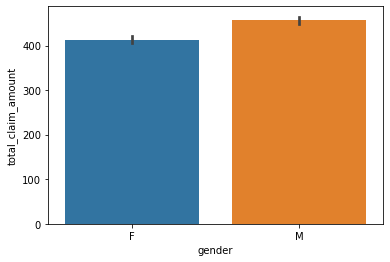

In [21]:
sns.barplot(x="gender", y="total_claim_amount", data=customer_df)
plt.show()

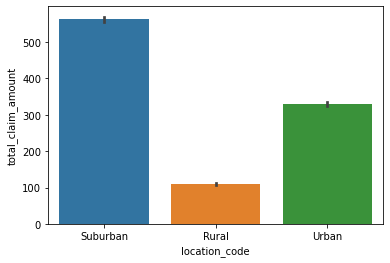

In [22]:
sns.barplot(x="location_code", y="total_claim_amount", data=customer_df)
plt.show()

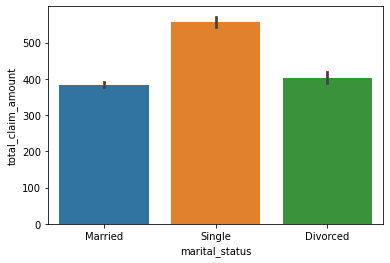

In [23]:
sns.barplot(x="marital_status", y="total_claim_amount", data=customer_df)
plt.show()

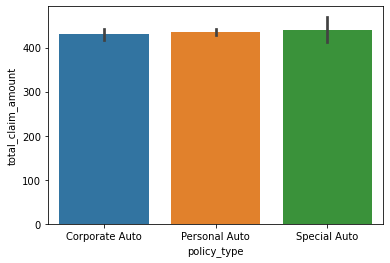

In [24]:
sns.barplot(x="policy_type", y="total_claim_amount", data=customer_df)
plt.show()

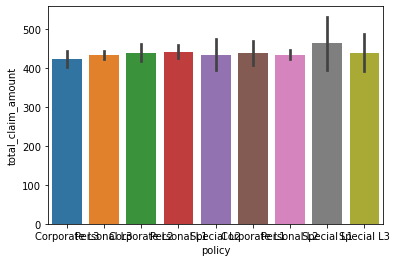

In [25]:
sns.barplot(x="policy", y="total_claim_amount", data=customer_df)
plt.show()

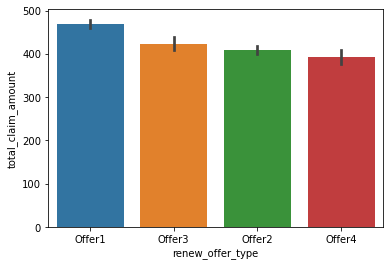

In [26]:
sns.barplot(x="renew_offer_type", y="total_claim_amount", data=customer_df)
plt.show()

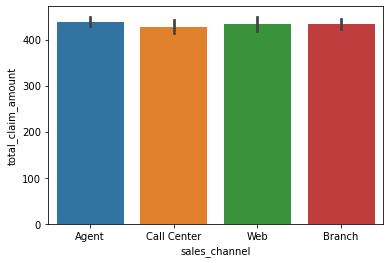

In [27]:
sns.barplot(x="sales_channel", y="total_claim_amount", data=customer_df)
plt.show()

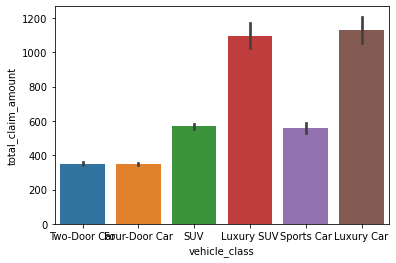

In [28]:
sns.barplot(x="vehicle_class", y="total_claim_amount", data=customer_df)
plt.show()

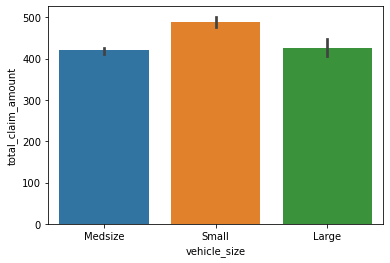

In [29]:
sns.barplot(x="vehicle_size", y="total_claim_amount", data=customer_df)
plt.show()

The main takeaways of the these last plots are that the 'total_claim_amount' is evenly distributed across the different 'states'; the 'total_claim_amount' is as well evenly distributed among the customers that have "Yes" and "No" as 'reponse'; the 'total_claim_amount' is higher  the more complete the insurance coverage is; the 'total_claim_amount' is more or less evenly distributed between customers regardless of their 'education' level; the 'total_claim_amount' is as well evenly distributed regardless of the 'employmentstatus', with a little spike among "Unemployed" customers; the 'total_claim_amount' is more or less evenly distributed among customers regardless of their 'gender'; the 'total_claim_amount' is higher the more urbanized the area where the customers live is; the 'total_claim_amount' does not substantially differ in relation with the 'marital_status' of the customers, but being higher for "Single" customers; the 'total_claim_amount' is evenly distributed among different 'policy_type(s)'; also the 'total_claim_amount' is evenly distributed among different policies; the 'total_claim_amount' is lower the higher the number of the 'renew_offer_type' is; the 'total_claim_amount' is evenly distributed among different 'sales_channel(s)'; the 'total_claim_amount' is higher for "Luxury SUV´s" and "Luxury Cars"; and that the 'total_claim_amount' is more or less evenly disributed regardless of the 'vehicle_size', but overall higher for "Small" vehicles. 

In [30]:
for i in categorical_df.columns:
    print(categorical_df[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


By checking .value_counts() of each categorical column I do not identify any more data cleaning that needs to be performed. It is true that we have some imbalance in the dataset in some of the categorical features that we may want to pay attention to (SMOTE, Tomek Links) if we were going to apply a Classification model. We could even apply bucketing to the column 'policy' to reduce the number of categories within the column, or to the column 'vehicle_class' to distinguish only between high-end vehicles and regular vehicles. Nevertheless, I do not see extremely necessary to do so in this premature point of the process without first applying a model and evaluating the metrics. 

In [31]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Even though I have already plotted all categorical variables of the customer_df dataset in the lab-clening-numerical-data (contained in categorical_df), that can be seen in this Notebook in cell #10, I am taking this opportunity to plot them again below with a with a different syntax. What I can see is the same as previously mentioned: 

Most of the customers are from "California" 'state'; the majority of the customers has "NO" as 'response'; there is preponderance toward "Basic" 'coverage'; slightly more than half of the customers have "College" or "Bachelor" 'education'; more than half of the customers are "Employed" and active; there is an equitable 'gender' balance of customers; more than half of the customers live in "Suburban" areas; more than half of the customers are "Married"; more than two-thirds of customers have coverage for a "Personal Auto"; the majority of customers have a "Personal" 'policy'; more than one-third of customers have the "Offer1" as 'renew_offer_type'; the majority of customers come from "Agent" or "Branch" 'sales_channel'; half of customers have a "Four-Door Car"; and most of the customers have a "Medsize" auto.

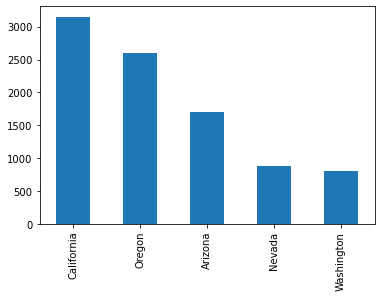

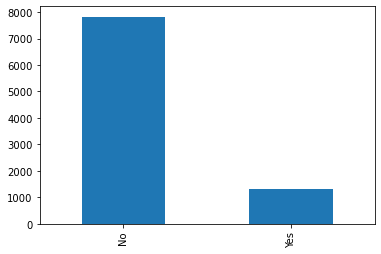

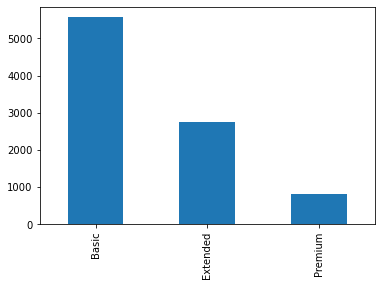

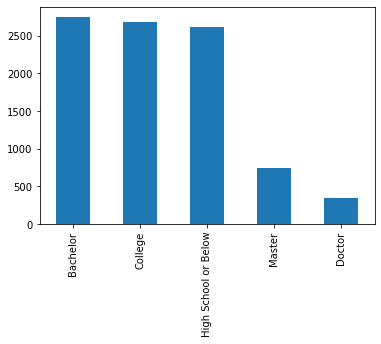

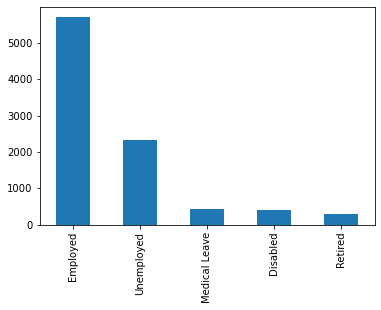

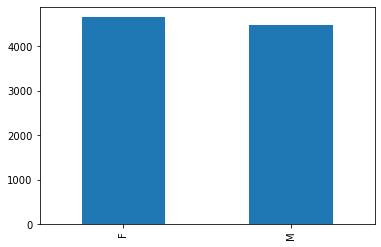

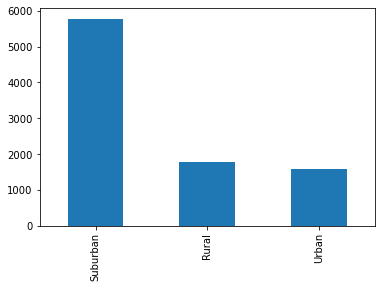

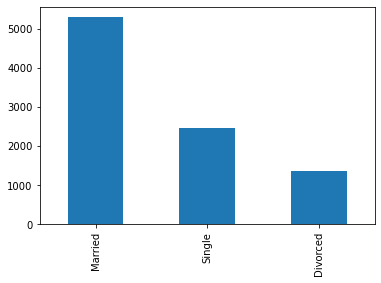

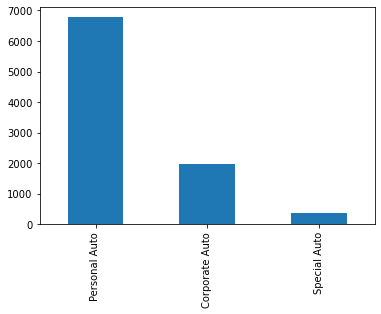

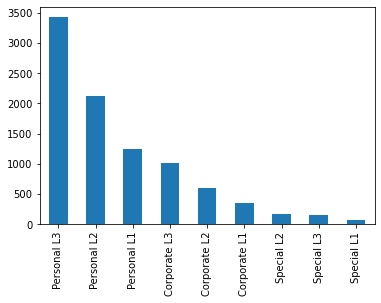

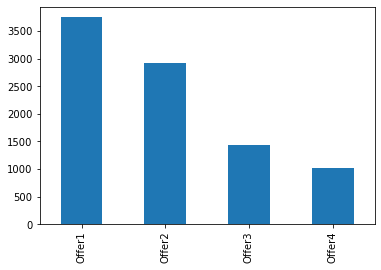

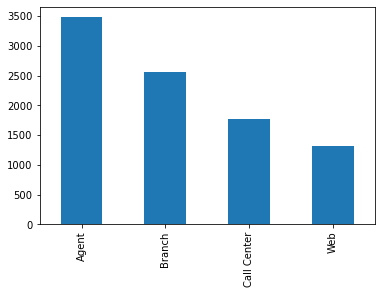

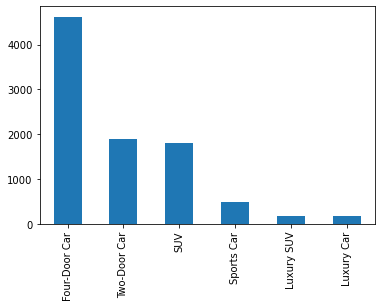

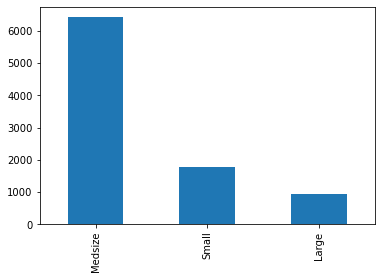

In [32]:
for col in categorical_df:
    categorical_df[col].value_counts().plot(kind='bar')
    plt.show()

Regarding redundancy, as previously mentioned when checking .value_counts() of each categorical column, we could apply bucketing to the column 'policy' to reduce the number of categories/values within the column, or to the column 'vehicle_class' to distinguish only between high-end vehicles and regular vehicles. Nevertheless, I do not see extremely necessary to do so in this premature point of the process without first applying a model and evaluating the metrics.

Continuing with the redundancy theme, when it comes to redundancy of columns/features, as it can be seen below 'policy_type' and 'policy' seem to be very similar, as well as 'vehicle_class' and 'vehicle_size', so we could evaluate the possibility of dropping one of each pair with the aim of improving  computational processing power. 

In [33]:
print(categorical_df['policy_type'].unique())
print()
print(categorical_df['policy'].unique())
print()
print(categorical_df['vehicle_class'].unique())
print()
print(categorical_df['vehicle_size'].unique())

['Corporate Auto' 'Personal Auto' 'Special Auto']

['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']

['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']

['Medsize' 'Small' 'Large']


# How to decide which column(s) to drop, if any? 
Neither of the columns 'policy_type', 'policy', 'vehicle_class', and 'vehicle_size' have NAN values

So, we can try to give answer to the above question by applying Chi-square tests, Contingecy tables and by checking their p-values:

In [34]:
from scipy.stats import chi2_contingency

categorical_df_crosstab1 = pd.crosstab(categorical_df['policy_type'], categorical_df['policy'], margins=True)
categorical_df_crosstab1

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,All
policy_type,,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0,1968
Personal Auto,0,0,0,1240,2122,3426,0,0,0,6788
Special Auto,0,0,0,0,0,0,66,164,148,378
All,359,595,1014,1240,2122,3426,66,164,148,9134


In [35]:
stats, p_value, dof, frequencies = chi2_contingency(categorical_df_crosstab1)
p_value

0.0

In [36]:
categorical_df_crosstab2 = pd.crosstab(categorical_df['vehicle_class'], categorical_df['vehicle_size'], margins=True)
categorical_df_crosstab2

vehicle_size,Large,Medsize,Small,All
vehicle_class,,,,
Four-Door Car,475,3237,909,4621
Luxury Car,16,106,41,163
Luxury SUV,18,125,41,184
SUV,167,1308,321,1796
Sports Car,49,366,69,484
Two-Door Car,221,1282,383,1886
All,946,6424,1764,9134


In [37]:
stats, p_value, dof, frequencies = chi2_contingency(categorical_df_crosstab2)
p_value

0.13452140780402744

Having applied Chi-square tests, Contingecy tables and by checking the p-values of 'policy_type', 'policy', 'vehicle_class', and 'vehicle_size' categorical features, we can determine that it is likely that 'policy_type' column or 'policy' column could be dropped without decreasing the metrics of the model, since the p_value for them is below 0.05, meaning that there is a considerable correlation between the two variables.

It is not the same for 'vehicle_class' and 'vehicle_size' columns which have a p-value above 0.05.

<AxesSubplot:xlabel='effective_to_date'>

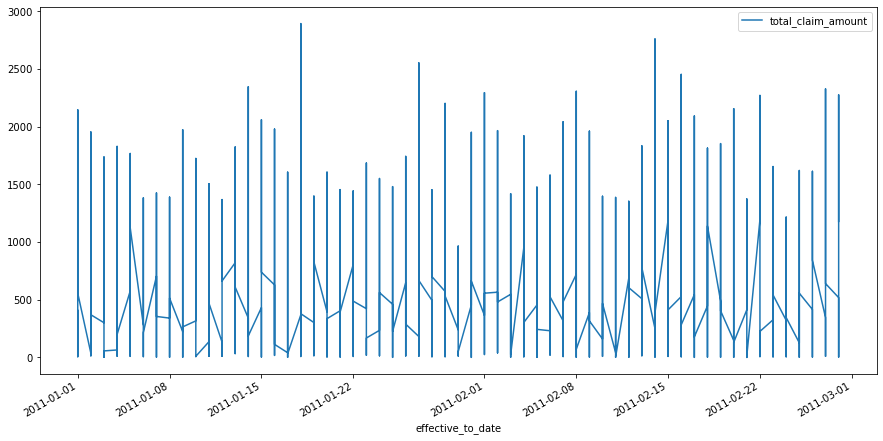

In [38]:
customer_df.plot(x= 'effective_to_date', y= 'total_claim_amount', kind='line', figsize=(15,7.5))

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

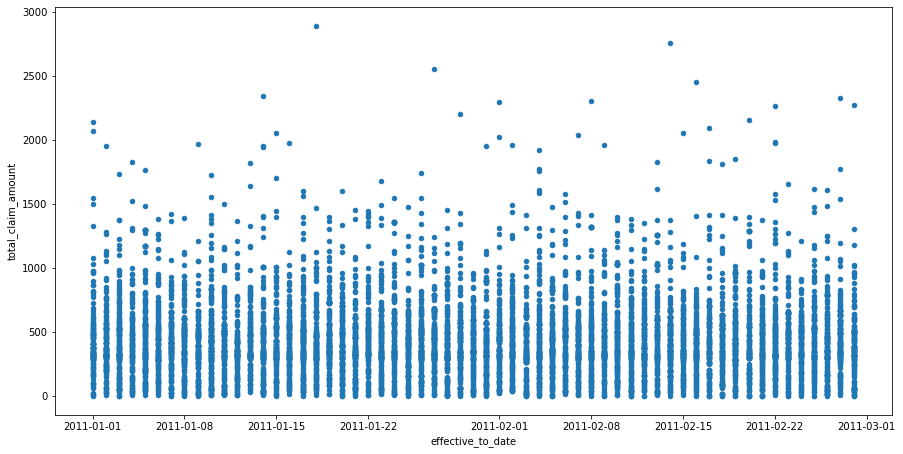

In [39]:
customer_df.plot(x= 'effective_to_date', y= 'total_claim_amount', kind='scatter', figsize=(15,7.5))

The relationship between the time variable and the target variable appears to be fairly homogeneous over the time span and I do not see anything particularly noteworthy. 

Since the data does not follow a normal distribution, the outlier data points will be calculated using the interquartile range (IQR) method, that are the ones falling below Q1 -1.5 IQR (25th percentile) or above Q3 +1.5 IQR (75th percentile). IQR represents the interquartile range calculated by Q3 minus Q1. 

In [40]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

As we have seen by using sns.boxplot in cell #12, the columns with outliers are: 'customer_lifetime_value', 'monthly_premium_auto', 'number_of_open_complaints', 'number_of_policies', and out target, 'total_claim_amount'. Let´s check out how many are there in each of these columns and their minimum and maximum value. 

In [41]:
outliers = find_outliers_IQR(customer_df['customer_lifetime_value'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 817
max outlier value: 83325.38119
min outlier value: 16414.04415


In [42]:
outliers = find_outliers_IQR(customer_df['monthly_premium_auto'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 430
max outlier value: 298
min outlier value: 171


In [43]:
outliers = find_outliers_IQR(customer_df['number_of_open_complaints'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 1882
max outlier value: 5
min outlier value: 1


In [44]:
outliers = find_outliers_IQR(customer_df['number_of_policies'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 416
max outlier value: 9
min outlier value: 9


In [45]:
outliers = find_outliers_IQR(customer_df['total_claim_amount'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 453
max outlier value: 2893.239678
min outlier value: 962.159318


Now, I proceed to remove the outliers:

In [46]:
def drop_outliers(df):
    for i in df.select_dtypes(np.number).columns:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR =q3-q1
        df = df[~((df[i]<(q1-1.5*IQR)) | (df[i] >(q3+1.5*IQR)))]
    return df

In [47]:
customer_df = drop_outliers(customer_df)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,TF56202,California,5032.165498,No,Basic,College,2011-02-12,Employed,M,66367,Suburban,Divorced,64,6,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [48]:
customer_df2 = customer_df.copy()

I am going to normalize the numerical variables with StandardScaler, but first I have to convert 'effective_to_date' back to an object to not have an error when applying StandardScaler.

In [49]:
customer_df2['effective_to_date'] = customer_df2['effective_to_date'].dt.strftime('%Y-%m-%d')

In [50]:
scaler = StandardScaler()

X = pd.get_dummies(customer_df2.drop('customer', axis=1))
y = customer_df2['total_claim_amount']
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.04711047  0.58101628 -0.78489792 ... -0.34058328  0.64978629
  -0.4889348 ]
 [ 2.1442151   0.33402063  0.99600123 ... -0.34058328  0.64978629
  -0.4889348 ]
 [ 0.49193333 -1.2705134   0.90467307 ... -0.34058328  0.64978629
  -0.4889348 ]
 ...
 [-0.94214259 -0.55969762 -0.32825711 ... -0.34058328  0.64978629
  -0.4889348 ]
 [ 0.45365872 -0.54860963  0.44803226 ...  2.93613948 -1.53896753
  -0.4889348 ]
 [-1.09492479 -1.2705134  -0.41958528 ... -0.34058328  0.64978629
  -0.4889348 ]]


Dealing with categorical variables:

In [51]:
customer_df2['coverage'] = customer_df2['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
customer_df2['employmentstatus'] = customer_df2['employmentstatus'].map({"Disabled" : 0, "Unemployed" : 1, "Retired" : 2, "Medical Leave" : 3, "Employed" : 4})
customer_df2['location_code'] = customer_df2['location_code'].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
customer_df2['vehicle_size'] = customer_df2['vehicle_size'].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [52]:
encoder = OneHotEncoder(handle_unknown='error')
encoder.fit_transform(customer_df2[['state']])
encoded1 = encoder.transform(customer_df2[['state']]).toarray()
encoder.fit_transform(customer_df2[['marital_status']])
encoded2 = encoder.transform(customer_df2[['marital_status']]).toarray()
encoder.fit_transform(customer_df2[['policy_type']])
encoded3 = encoder.transform(customer_df2[['policy_type']]).toarray()
encoder.fit_transform(customer_df2[['policy']])
encoded4 = encoder.transform(customer_df2[['policy']]).toarray()
encoder.fit_transform(customer_df2[['renew_offer_type']])
encoded5 = encoder.transform(customer_df2[['renew_offer_type']]).toarray()
encoder.fit_transform(customer_df2[['sales_channel']])
encoded6 = encoder.transform(customer_df2[['sales_channel']]).toarray()
encoder.fit_transform(customer_df2[['vehicle_class']])
encoded7 = encoder.transform(customer_df2[['vehicle_class']]).toarray()

In [53]:
encoded1_df = pd.DataFrame(encoded1, columns=['state1', 'state2', 'state3', 'state4', 'state5'])
customer_df2 = customer_df2.join(encoded1_df, how='left', lsuffix='', rsuffix ='')                                                                                              
encoded2_df = pd.DataFrame(encoded2, columns=['marital_status1', 'marital_status2', 'marital_status3'])
customer_df2 = customer_df2.join(encoded2_df, how='left', lsuffix='', rsuffix ='')                                                                                              
encoded3_df = pd.DataFrame(encoded3, columns=['policy_type1', 'policy_type2', 'policy_type3'])
customer_df2 = customer_df2.join(encoded3_df, how='left', lsuffix='', rsuffix='')
encoded4_df = pd.DataFrame(encoded4, columns=['policy1', 'policy2', 'policy3', 'policy4', 'policy5', 'policy6', 'policy7', 'policy8', 'policy9'])
customer_df2 = customer_df2.join(encoded4_df, how='left', lsuffix='', rsuffix='')
encoded5_df = pd.DataFrame(encoded5, columns=['renew_offer_type1', 'renew_offer_type2', 'renew_offer_type3', 'renew_offer_type4'])
customer_df2 = customer_df2.join(encoded5_df, how='left', lsuffix='', rsuffix='')
encoded6_df = pd.DataFrame(encoded6, columns=['sales_channel1', 'sales_channel2', 'sales_channel3', 'sales_channel4'])
customer_df2 = customer_df2.join(encoded6_df, how='left', lsuffix='', rsuffix='')                         
encoded7_df = pd.DataFrame(encoded7, columns=['vehicle_class1', 'vehicle_class2', 'vehicle_class3', 'vehicle_class4'])
customer_df2 = customer_df2.join(encoded7_df, how='left', lsuffix='', rsuffix='')

customer_df2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,state1,state2,state3,state4,state5,marital_status1,marital_status2,marital_status3,policy_type1,policy_type2,policy_type3,policy1,policy2,policy3,policy4,policy5,policy6,policy7,policy8,policy9,renew_offer_type1,renew_offer_type2,renew_offer_type3,renew_offer_type4,sales_channel1,sales_channel2,sales_channel3,sales_channel4,vehicle_class1,vehicle_class2,vehicle_class3,vehicle_class4
0,BU79786,Washington,2763.519279,No,0,Bachelor,2011-02-24,4,F,56274,1,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,AI49188,Nevada,12887.431650,No,2,Bachelor,2011-02-19,4,F,48767,1,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,WW63253,California,7645.861827,No,0,Bachelor,2011-01-20,1,M,0,1,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,HB64268,Washington,2813.692575,No,0,Bachelor,2011-02-03,4,M,43836,0,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,OC83172,Oregon,8256.297800,Yes,0,Bachelor,2011-01-25,4,F,62902,0,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,TF56202,California,5032.165498,No,0,College,2011-02-12,4,M,66367,1,Divorced,64,6,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9128,YM19146,California,4100.398533,No,2,College,2011-01-06,4,F,47761,1,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9130,PK87824,California,3096.511217,Yes,1,College,2011-02-12,4,F,21604,1,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,UP19263,California,7524.442436,No,1,College,2011-02-03,4,M,21941,1,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As mentioned in between cell #15 and cell #16, I will again set after encoding, the column 'customer' as the index column:

In [54]:
customer_df2 = customer_df2.set_index('customer')

Tranforming, again, 'effective_to_date' column to datetime type to be able to separate day, month and year: 

In [55]:
customer_df2['effective_to_date'] = pd.to_datetime(customer_df2['effective_to_date'])
customer_df2['day'] = customer_df2['effective_to_date'].dt.day
customer_df2['month'] = customer_df2['effective_to_date'].dt.month
customer_df2['year'] = customer_df2['effective_to_date'].dt.year
customer_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5888 entries, BU79786 to Y167826
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          5888 non-null   object        
 1   customer_lifetime_value        5888 non-null   float64       
 2   response                       5888 non-null   object        
 3   coverage                       5888 non-null   int64         
 4   education                      5888 non-null   object        
 5   effective_to_date              5888 non-null   datetime64[ns]
 6   employmentstatus               5888 non-null   int64         
 7   gender                         5888 non-null   object        
 8   income                         5888 non-null   int64         
 9   location_code                  5888 non-null   int64         
 10  marital_status                 5888 non-null   object        
 11  monthly_premi

Encoding the last categorical variables ('response', 'education', and 'gender'). I will use Ordinal Encoding. 

Apart from encoding the last categorical features, I will drop the categorical columns that have already been encoded with OneHotEconder and still are in the dataframe ('state', 'marital_status', 'policy_type', 'policy' -that I could even drop the already encoded new numerical columns due to its low p-value with respect to 'policy_type'-, 'renew_offer_type', 'sales_channel', and 'vehicle_class'). Additionally, I will drop datetime type 'effective_to_date' column since it has already been splitted to numerical columns 'day', 'month', and 'year'.

In [56]:
customer_df2['response'] = customer_df2['response'].map({"No" : 0, "Yes" : 1})
customer_df2['education'] = customer_df2['education'].map({"High School or Below" : 0, "Bachelor" : 1, "College" : 2, "Master" : 3, "Doctor" : 4})
customer_df2['gender'] = customer_df2['gender'].map({"M" : 0, "F" : 1})
customer_df2.drop(['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'effective_to_date'], axis=1, inplace=True)
customer_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5888 entries, BU79786 to Y167826
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        5888 non-null   float64
 1   response                       5888 non-null   int64  
 2   coverage                       5888 non-null   int64  
 3   education                      5888 non-null   int64  
 4   employmentstatus               5888 non-null   int64  
 5   gender                         5888 non-null   int64  
 6   income                         5888 non-null   int64  
 7   location_code                  5888 non-null   int64  
 8   monthly_premium_auto           5888 non-null   int64  
 9   months_since_last_claim        5888 non-null   int64  
 10  months_since_policy_inception  5888 non-null   int64  
 11  number_of_open_complaints      5888 non-null   int64  
 12  number_of_policies             5888 non-null